###### Importing librabies

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re
from sklearn.cluster import KMeans

C:\Users\asus\AppData\Roaming\Python\Python311\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


##### importing the dataset 

In [3]:
df=pd.read_csv('https://gist.githubusercontent.com/ryanorsinger/cb1222e506c1266b9cc808143ddbab82/raw/b2fe8213426159be7f9c8de108726d3d814153eb/mall_customers.csv')

###### Data Analysis 

In [4]:
#show the top 5 datapoints of DataFrame 
df.head()

,customer_id,gender,age,annual_income,spending_score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [6]:
#show the bottom 5 datapoint of DataFrame 
df.tail()

,customer_id,gender,age,annual_income,spending_score
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


In [5]:
#Find the no. of rows and no. of columns in DataFrame
df.shape

#if we have low amount of datpoints,
#how can we enlarge the present datapoints to train our model

(200, 5)

In [8]:
#How many null value in each column of DataFrame
df.isnull().sum()

customer_id       0
gender            0
age               0
annual_income     0
spending_score    0
dtype: int64

In [7]:
##check information of each column -> dtype, Non-Null Count
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   customer_id     200 non-null    int64 
 1   gender          200 non-null    object
 2   age             200 non-null    int64 
 3   annual_income   200 non-null    int64 
 4   spending_score  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [9]:
#show the all statistical data of DataFrame 
df.describe()

,customer_id,age,annual_income,spending_score
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


<Axes: xlabel='age', ylabel='count'>

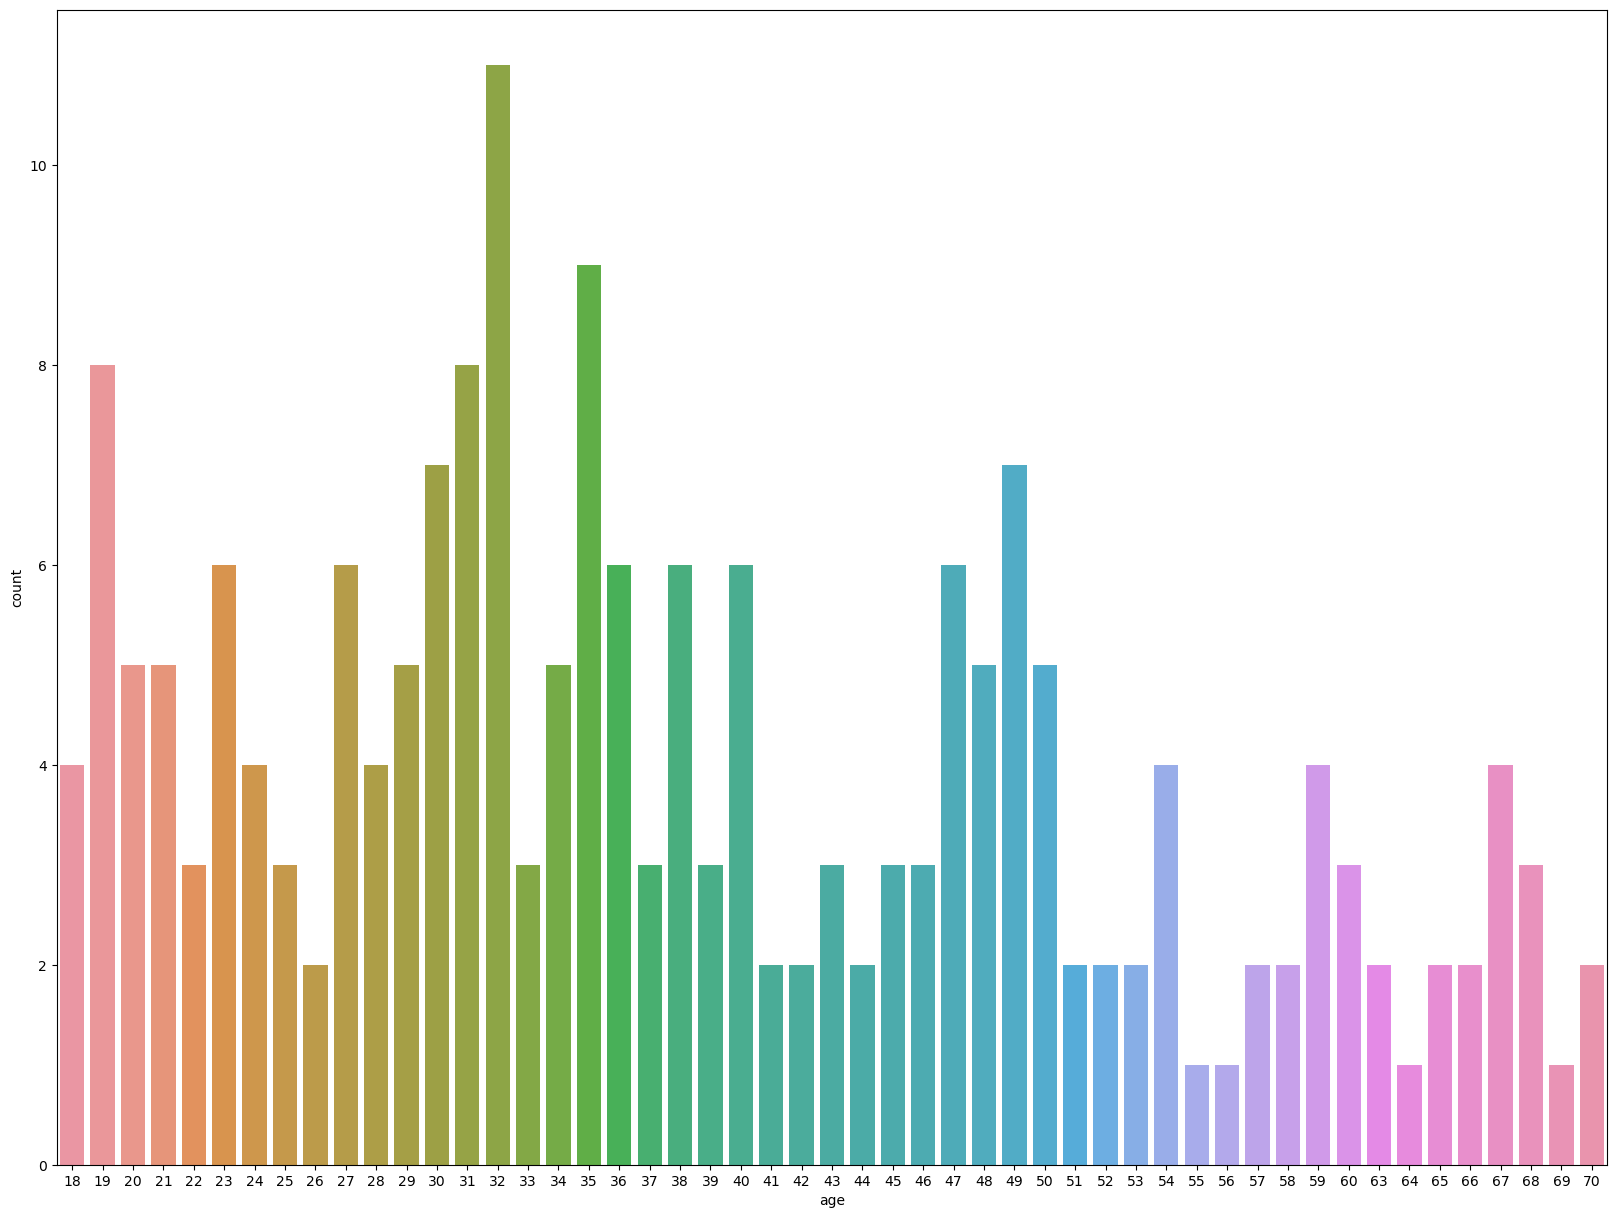

In [11]:
#show the distribution of age using plot 
plt.figure(figsize=(20,15))
sns.countplot(data=df,x='age')

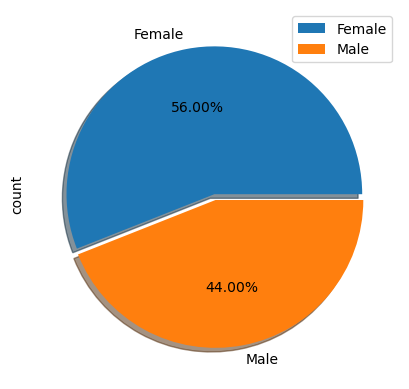

In [27]:
#how many % of male & Female visits the mall with the help of a plot 
df.gender.value_counts().plot(kind='pie',autopct='%.2f%%',shadow=True,
                              explode=(0,0.04))
plt.legend()

([<matplotlib.patches.Wedge at 0x2326a09d650>,
 [Text(-0.20611945413751356, 1.080515974257694, ''),
  Text(0.20611945413751367, -1.080515974257694, '')])

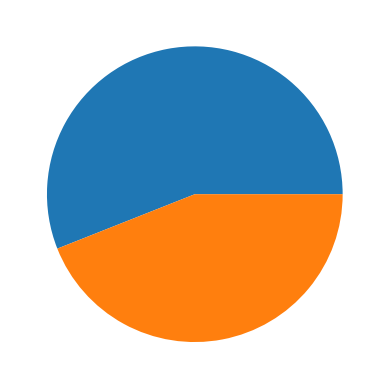

In [23]:
plt.pie(df.gender.value_counts())#it is wrong approach because don't mention as data 
#plt.legend() depends on labels.
#labels=['Male','Female'] this will give incorrect information 

Text(0.5, 1.0, 'Distribution of annual income')

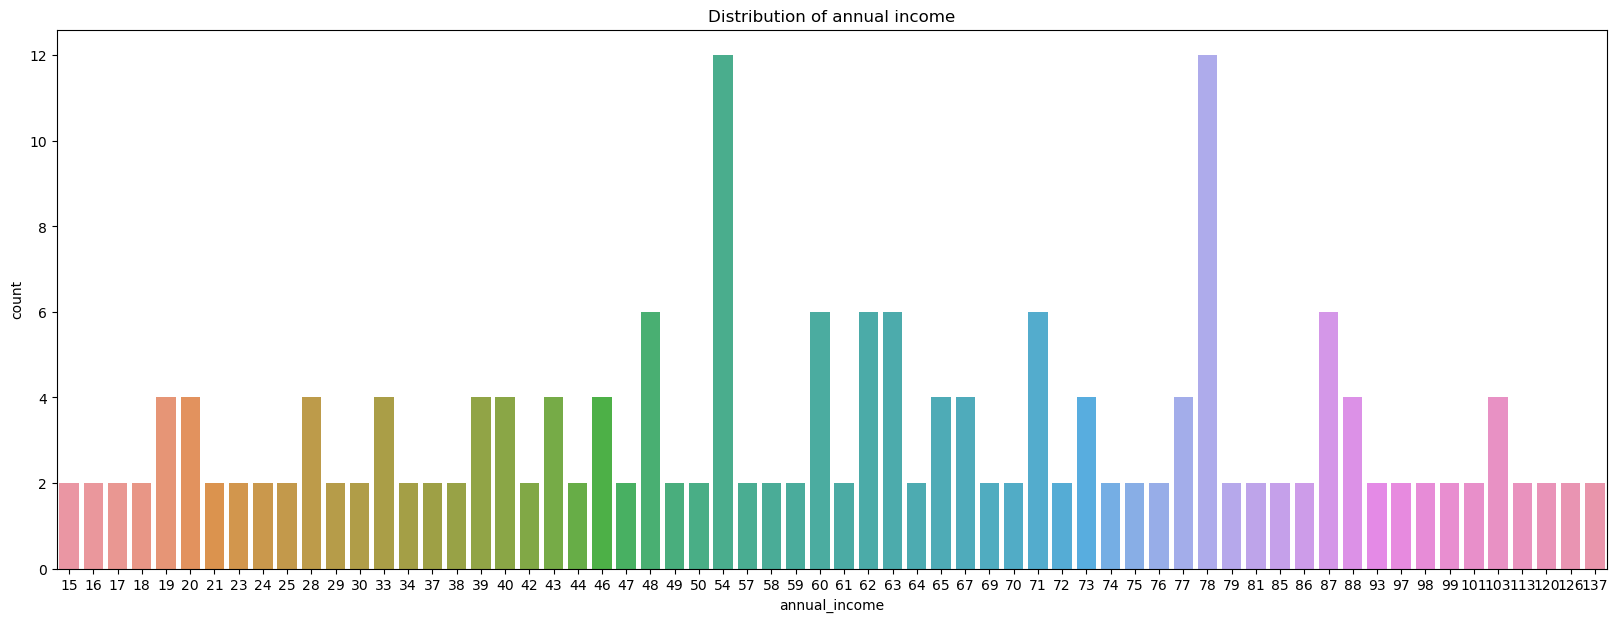

In [32]:
#Distribution of annual_income
plt.figure(figsize=(20,7))
sns.countplot(x='annual_income',data=df)
plt.title('Distribution of annual income')

<Axes: xlabel='annual_income', ylabel='count'>

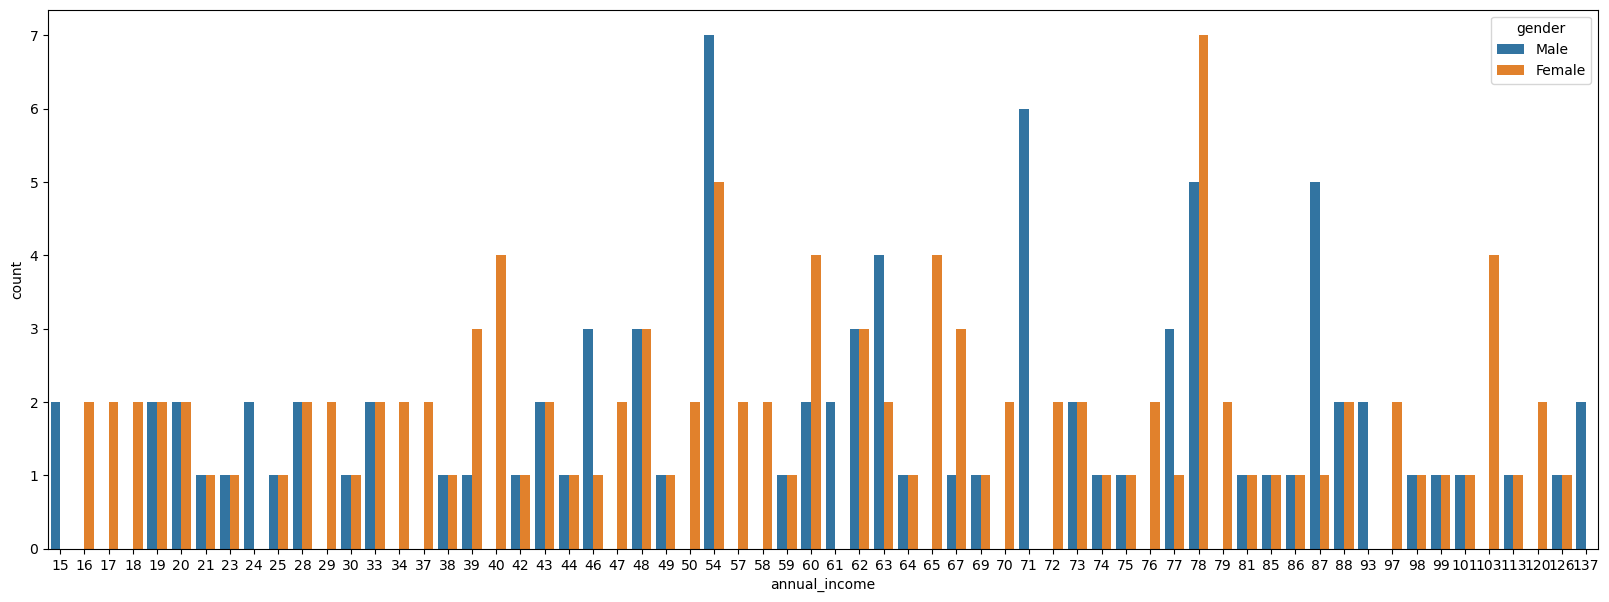

In [33]:
#show the Distribution of annual income w.r.t to gender 
plt.figure(figsize=(20,7))
sns.countplot(x='annual_income',data=df,hue='gender')

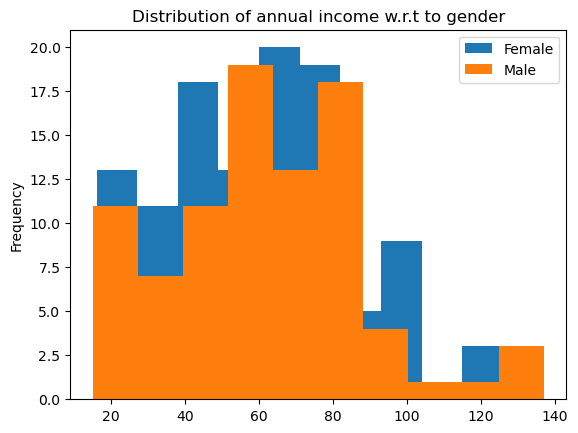

In [44]:
#Distribution of annual income w.r.t to gender
df.annual_income.groupby(df.gender).plot(kind='hist')
plt.title('Distribution of annual income w.r.t to gender')
plt.legend()

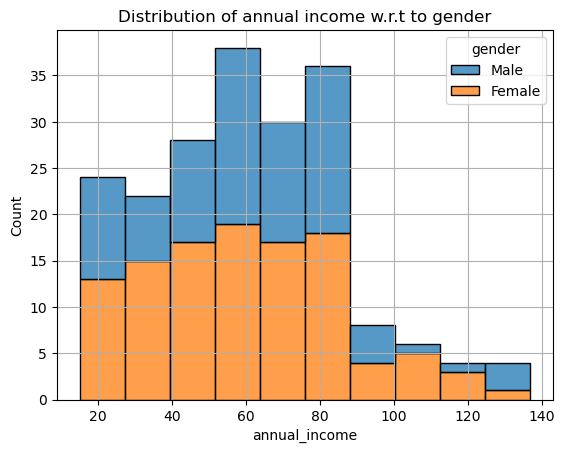

In [46]:
#Distribution of annual income w.r.t to gender
import warnings
warnings.filterwarnings('ignore')

sns.histplot(df,x='annual_income',hue='gender',multiple='stack')
plt.title('Distribution of annual income w.r.t to gender')
plt.grid()

###### snsborn library lmplot

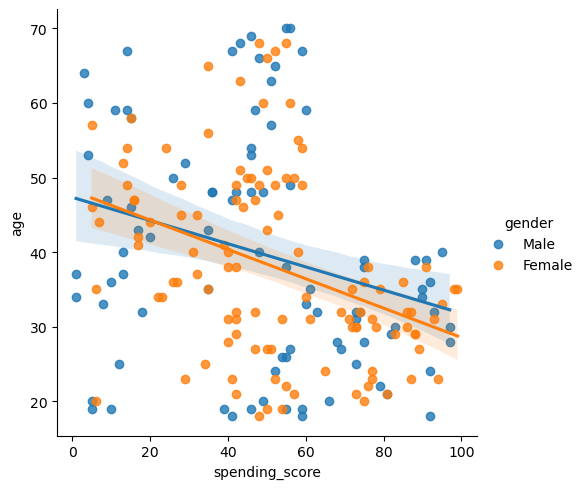

In [48]:
sns.lmplot(data=df,x='spending_score',y='age',hue='gender')

### Machine learning 

In [49]:
df.head()

,customer_id,gender,age,annual_income,spending_score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


LabelEncoder 

In [50]:
from sklearn.preprocessing import LabelEncoder

In [51]:
df['gender']=LabelEncoder().fit_transform(df['gender'])

In [53]:
#Drop the customer_id column from the DataFrame 
df.drop('customer_id',axis=1,inplace=True)

In [54]:
#find the k value using Elbow method 
ssd=[]
for i in range(1,11):
    kmodel=KMeans(n_clusters=i,n_init=15,max_iter=500)
    kmodel.fit(df)
    ssd.append(kmodel.inertia_)

In [55]:
#distance from centroid and cluster
ssd

[308862.06,
 212889.44245524297,
 143391.5923603568,
 104422.8349853975,
 75427.71182424155,
 58348.64136331505,
 51167.19736842106,
 44357.6215098352,
 40971.7793053329,
 37391.42987012987]

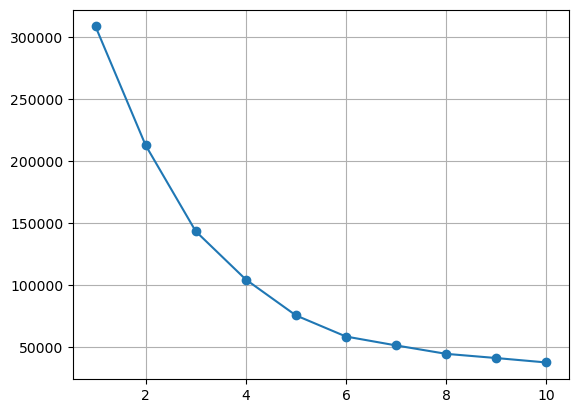

In [56]:
#plot the Elbow to find k where distance b/w two cluster is very less decreasing
#k=6 to 7 decreasing of distance factor is very less so k=6
plt.plot(range(1,11),ssd,marker='o')
plt.grid()
plt.title('Elbow plot')

In [ ]:
#k=6

###### Choosing the model

In [57]:
kmodel=KMeans(n_clusters=6)

###### Trained the model

In [58]:
kmodel.fit(df)

#also do in this way combine of fit and predict
#kmodel.fit_predict(df)

KMeans(n_clusters=6)

###### Test the model

In [59]:
prediction=kmodel.predict(df)

###### Cluster value for datapoint lies 

In [60]:
prediction

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 1, 3, 4, 3,
       4, 3, 1, 3, 3, 3, 1, 3, 3, 1, 1, 1, 1, 1, 3, 1, 1, 3, 1, 1, 1, 3,
       1, 1, 3, 3, 1, 1, 1, 1, 1, 3, 1, 1, 3, 1, 1, 1, 1, 1, 3, 1, 1, 3,
       3, 1, 1, 3, 1, 1, 1, 3, 1, 3, 1, 3, 0, 1, 1, 3, 1, 0, 1, 1, 1, 1,
       1, 3, 1, 3, 3, 3, 1, 1, 1, 1, 3, 0, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 5, 2,
       5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2,
       5, 2])

In [61]:
kmodel.cluster_centers_

array([[  0.53571429,  37.07142857,  76.10714286,  20.32142857],
       [  0.42      ,  54.14      ,  54.48      ,  49.16      ],
       [  0.46153846,  32.69230769,  86.53846154,  82.12820513],
       [  0.41666667,  24.91666667,  40.60416667,  64.625     ],
       [  0.40909091,  44.31818182,  25.77272727,  20.27272727],
       [  0.38461538,  44.53846154, 105.07692308,  20.15384615]])

In [62]:
#find number of centroid 
len(kmodel.cluster_centers_)

6

In [63]:
#create a new column 'cluster' in DataFrame 
df['cluster']=prediction

In [64]:
#show the top 10 datapoint of DataFrame 
df.head(10)

,gender,age,annual_income,spending_score,cluster
0,1,19,15,39,4
1,1,21,15,81,3
2,0,20,16,6,4
3,0,23,16,77,3
4,0,31,17,40,4
5,0,22,17,76,3
6,0,35,18,6,4
7,0,23,18,94,3
8,1,64,19,3,4
9,0,30,19,72,3


In [65]:
sns.color_palette(None,len(np.unique(prediction)))

[(0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (1.0, 0.4980392156862745, 0.054901960784313725),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 (0.5490196078431373, 0.33725490196078434, 0.29411764705882354)]

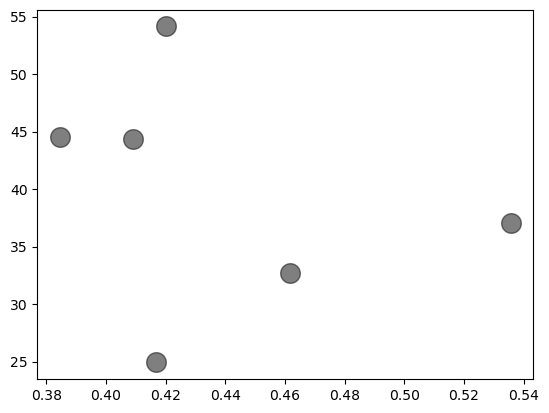

In [66]:
#show the centriod position using plot
plt.scatter(kmodel.cluster_centers_[:,0],kmodel.cluster_centers_[:,1],
            c='black',s=200,alpha=0.5)

In [68]:
#import package for k-mean hierarchy
from scipy.cluster.hierarchy import linkage,dendrogram

In [69]:
var=linkage(df,method='ward')

{'icoord': [[15.0, 15.0, 25.0, 25.0],
  [5.0, 5.0, 20.0, 20.0],
  [45.0, 45.0, 55.0, 55.0],
  [65.0, 65.0, 75.0, 75.0],
  [50.0, 50.0, 70.0, 70.0],
  [35.0, 35.0, 60.0, 60.0],
  [105.0, 105.0, 115.0, 115.0],
  [95.0, 95.0, 110.0, 110.0],
  [85.0, 85.0, 102.5, 102.5],
  [47.5, 47.5, 93.75, 93.75],
  [145.0, 145.0, 155.0, 155.0],
  [135.0, 135.0, 150.0, 150.0],
  [125.0, 125.0, 142.5, 142.5],
  [165.0, 165.0, 175.0, 175.0],
  [185.0, 185.0, 195.0, 195.0],
  [170.0, 170.0, 190.0, 190.0],
  [133.75, 133.75, 180.0, 180.0],
  [70.625, 70.625, 156.875, 156.875],
  [12.5, 12.5, 113.75, 113.75],
  [225.0, 225.0, 235.0, 235.0],
  [215.0, 215.0, 230.0, 230.0],
  [205.0, 205.0, 222.5, 222.5],
  [245.0, 245.0, 255.0, 255.0],
  [265.0, 265.0, 275.0, 275.0],
  [295.0, 295.0, 305.0, 305.0],
  [285.0, 285.0, 300.0, 300.0],
  [270.0, 270.0, 292.5, 292.5],
  [250.0, 250.0, 281.25, 281.25],
  [213.75, 213.75, 265.625, 265.625],
  [325.0, 325.0, 335.0, 335.0],
  [315.0, 315.0, 330.0, 330.0],
  [355.0, 355.

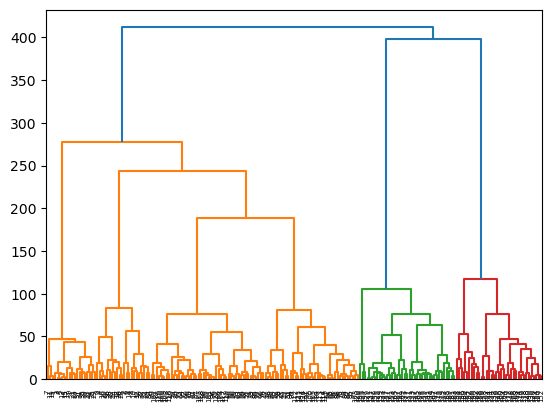

In [70]:
dendrogram(var,leaf_rotation=90)

In [71]:
#DBSCAN